In [1]:
from sportsipy.nfl.teams import Teams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import math
%matplotlib inline

#by u/HarambeTheFox
#Instead of showing cumulative points scored and against, this takes averages to account for bye week discrepancies. 

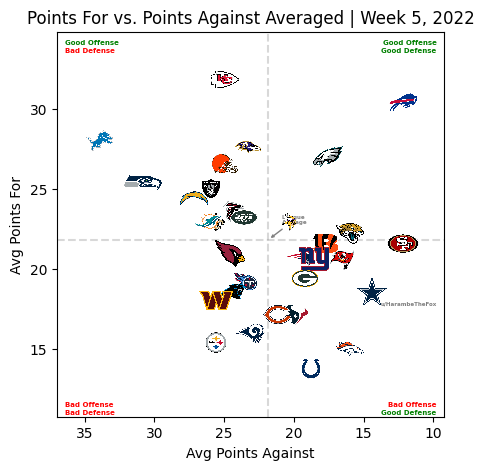

In [4]:
dimensions = (5, 5)
fig, ax = plt.subplots(figsize = dimensions)

#create a data frame with 3 columns: team name, points against, and points for. 
#32 rows for each team and their respective information. 
teams = []
points_for = []
points_against = []
for team in Teams('2022'):
    teams.append(team.abbreviation)
    points_for.append(team.points_for / team.games_played)
    points_against.append(team.points_against / team.games_played)
d = {"Team" : teams, "Avg Points Against" : points_against, "Avg Points For" : points_for}
df = pd.DataFrame(d)

#create graph
graph = sns.scatterplot(ax = ax, x = "Avg Points Against", y = "Avg Points For", data = df, s = 0)

#Image function, iterates through team name in data frame and adds team image at its coordinates. 
def images(dfname, xcol, ycol, graph_name):
    for team in dfname["Team"]:
        arr_img = plt.imread(team + ".png")
        imagebox = OffsetImage(arr_img, zoom = 0.03)
        ab = AnnotationBbox(imagebox, [(dfname.loc[dfname[dfname["Team"]==team].index.values][xcol]), 
                                    (dfname.loc[dfname[dfname["Team"]==team].index.values][ycol])], frameon = False)
        graph_name.add_artist(ab)

#these two variables are to easily add the dotted lines
league_avg_for = 0
for value in df["Avg Points For"]:
    league_avg_for += value/32

league_avg_against = 0
for value in df["Avg Points Against"]:
    league_avg_against += value/32

#set limits so nothing covers text and so the x axis is inverted
ax.set_xlim(df["Avg Points Against"].max() + 3, df["Avg Points Against"].min() - 3)
ax.set_ylim(df["Avg Points For"].min() - 3, df["Avg Points For"].max() + 3)

#annotations
plt.axvline(x = league_avg_against, ls = '--', color = "gray", alpha = 0.3)
plt.axhline(y = league_avg_for, ls = '--', color = "gray", alpha = 0.3)
plt.text(0.02, 0.98, "Good Offense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.02, 0.96, "Bad Defense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.98, "Good Offense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.96, "Good Defense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.02, 0.02, "Bad Defense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(0.02, 0.04, "Bad Offense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.02, "Good Defense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.04, "Bad Offense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.30, "u/HarambeTheFox", horizontalalignment = "right", verticalalignment = "top", size = 4, color = "gray",
         weight = "semibold", transform = ax.transAxes)
graph.annotate("League \nAverage", xy = (league_avg_against, league_avg_for),
               xytext = (league_avg_against - 1, league_avg_for + 1), color = "gray",
               arrowprops = dict(arrowstyle = '->', color = "gray"), weight = "semibold", size = 4)
def annotation(annotationtxt, dfname, team, xcol, ycol, locationx, locationy, teamcolor, size):
    graph.annotate(annotationtxt, (dfname.loc[dfname[dfname['Team']==team].index.values][xcol],
                             dfname.loc[dfname[dfname['Team']==team].index.values][ycol]),
               xytext = (dfname.loc[dfname[dfname['Team']==team].index.values][xcol]+ locationx,
                             dfname.loc[dfname[dfname['Team']==team].index.values][ycol]+ locationy), 
               arrowprops = dict(arrowstyle = '->', color = teamcolor), size = size, color = teamcolor)
#add images
images(df, "Avg Points Against", "Avg Points For", graph)

ax.set_title("Points For vs. Points Against Averaged | Week 5, 2022")
plt.savefig("Points For vs. Points Against Averaged Week 5 2022.png", dpi = 500)